In [1]:
import psi4
import pdft
import numpy as np
from scipy import ndimage
import libcubeprop
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
psi4.core.set_output_file("tests/formic.psi4")
functional = 'b3lyp'
basis = 'cc-pvdz'
Full_Molec = psi4.geometry("""
nocom
noreorient
C    0.0000000    0.1929272   -1.9035340
O    0.0000000    1.1595219   -1.1616236
O    0.0000000   -1.0680669   -1.5349870
H    0.0000000    0.2949802   -2.9949776
H    0.0000000   -1.1409414   -0.5399614
C    0.0000000   -0.1929272    1.9035340
O    0.0000000   -1.1595219    1.1616236
O    0.0000000    1.0680669    1.5349870
H    0.0000000   -0.2949802    2.9949776
H    0.0000000    1.1409414    0.5399614
units bohr
symmetry c1
""")
mol = pdft.U_Molecule(Full_Molec, basis, functional)
#%% 1 basis 2D plot
L = [2.0, 2.0, 2.0]
D = [0.05, 0.1, 0.1]
# Plot file
O, N = libcubeprop.build_grid(mol.wfn, L, D)
atoms= libcubeprop.get_atoms(mol.wfn, D, O)

In [3]:
atoms[:,0]

array([6., 8., 8., 1., 1., 6., 8., 8., 1., 1.])

In [21]:
#We can bring the cubefile as a Numpy array
vp, cube_info = libcubeprop.cube_to_array("tests/formic/twobasis_b3lyp/formic4.cube")

In [22]:
vp.shape

(80, 64, 100)

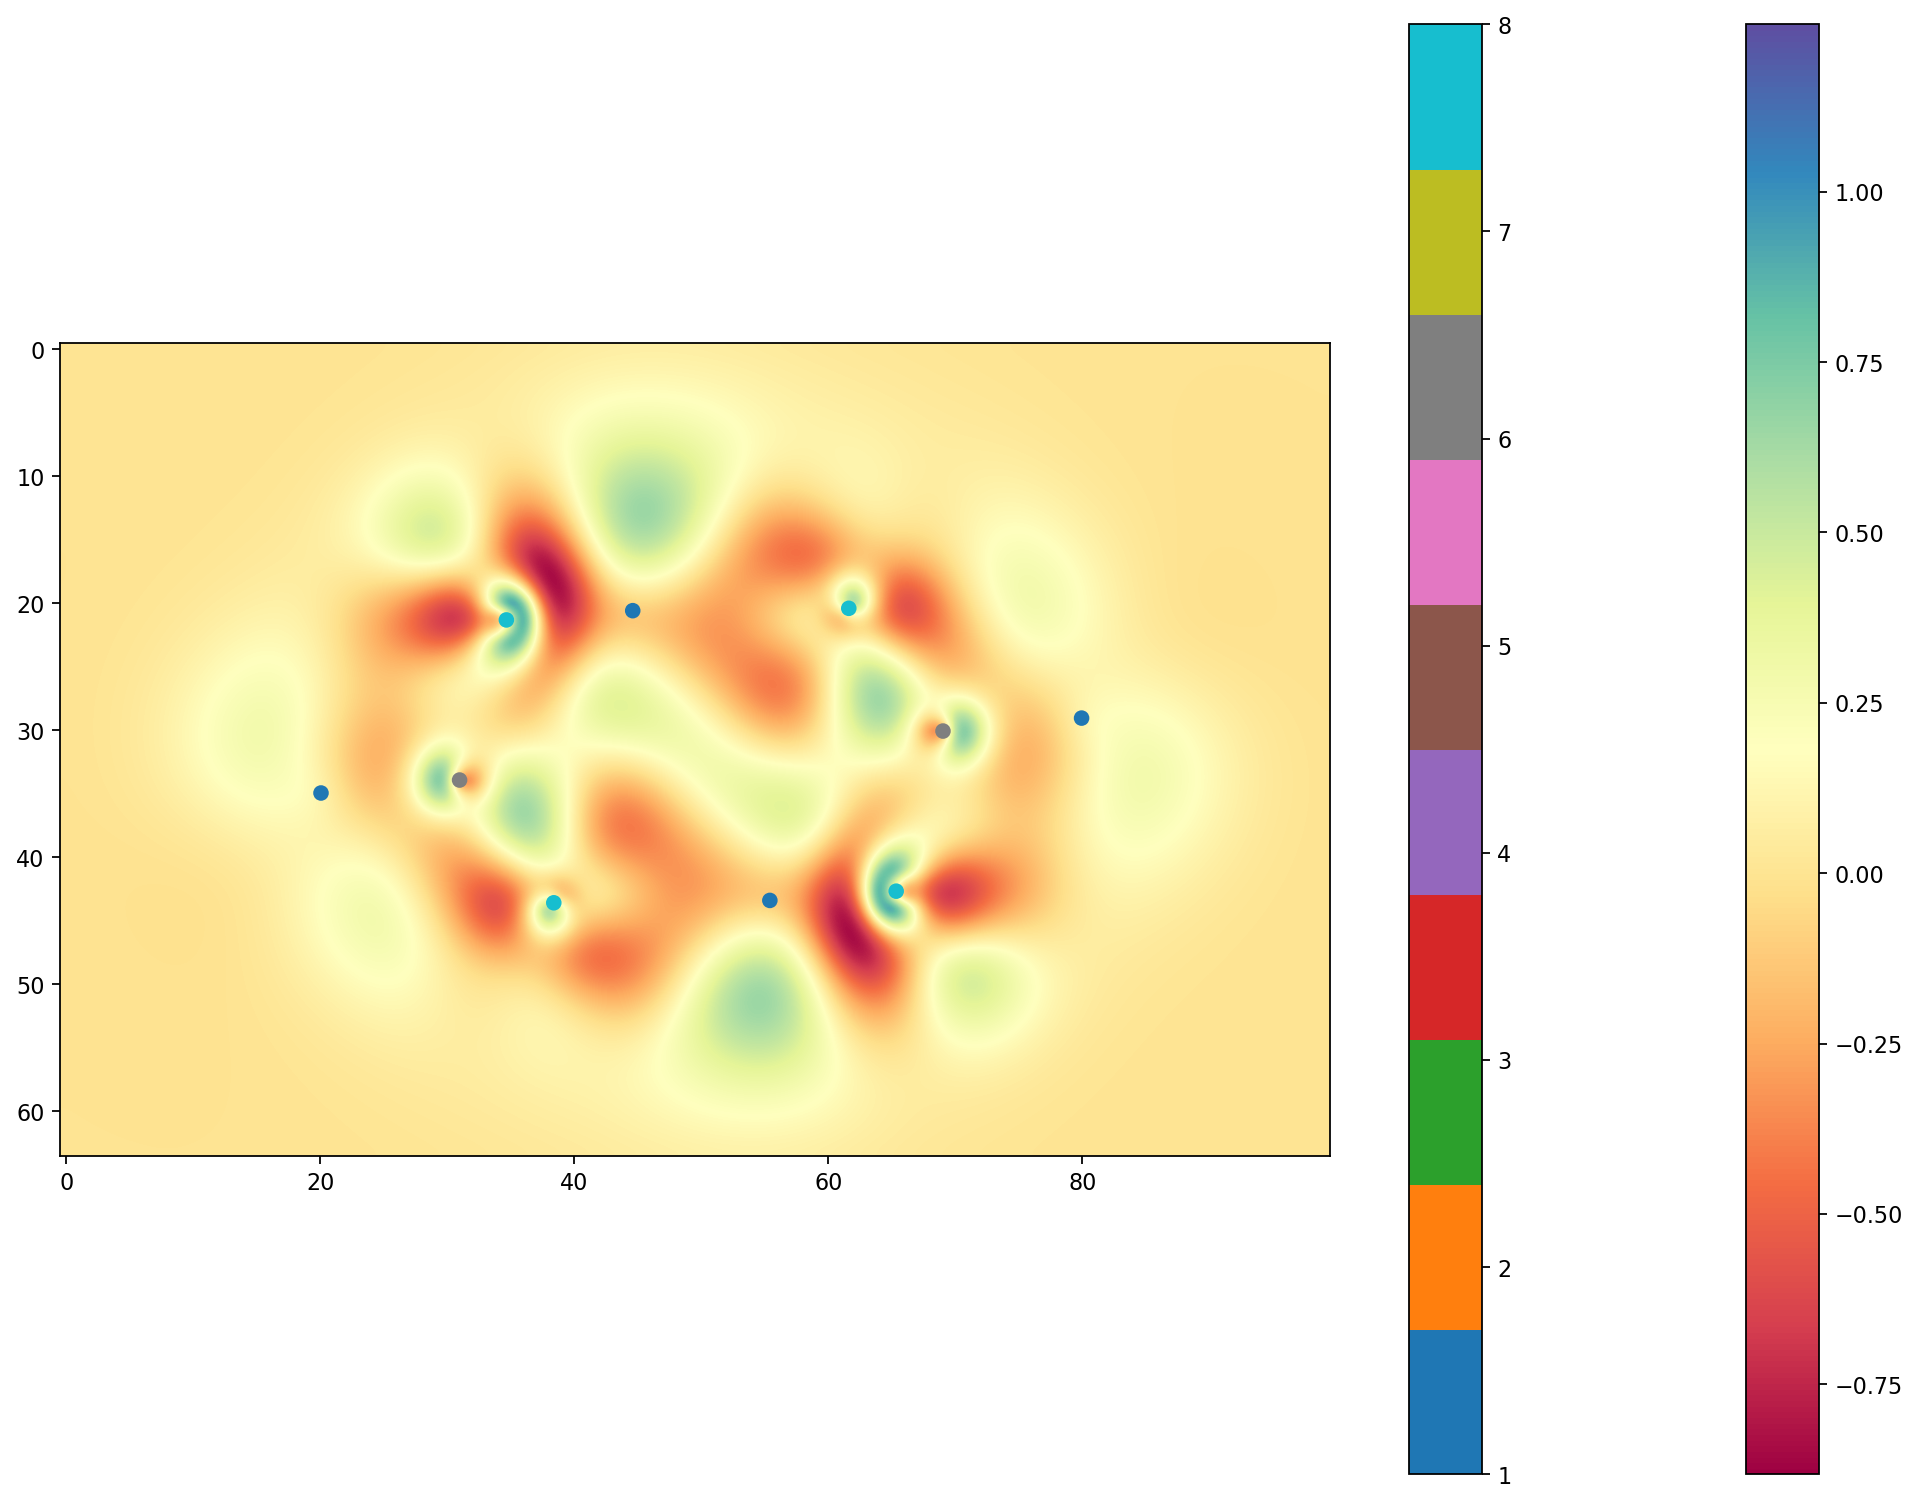

In [23]:
#Rotate the image to match the previously shown models.
# rotated_img = ndimage.rotate(h2o_cube[15:50,43,20:50], -90)
f, ax = plt.subplots(1, 1, figsize=(16, 12), dpi=160)
p = ax.imshow(vp[41, :, :], interpolation="bicubic", cmap="Spectral")
q = ax.scatter(atoms[:,3], atoms[:,2], vmin=1, vmax=8,c=atoms[:,0], cmap="tab10")
f.colorbar(p, ax=ax)
f.colorbar(q, ax=ax)
# f.savefig("tests/formic/onebasis_b3lyp/formic_svd-7_b2lyp")

In [8]:
print(repr(np.zeros((3,3))))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])
